In [121]:
import warnings
warnings.filterwarnings('ignore')

In [83]:
import os

MNIST_PATH = os.path.join("datasets", "mnist")

In [84]:
import pandas as pd

def load_mnist_dataset():
    csv_path = os.path.join(MNIST_PATH, "kaggle_mnist_train.csv")
    return pd.read_csv(csv_path)

In [85]:
mnist_data = load_mnist_dataset()

In [86]:
y_train = mnist_data["label"].as_matrix()
X_train = mnist_data.drop("label", axis=1).as_matrix()

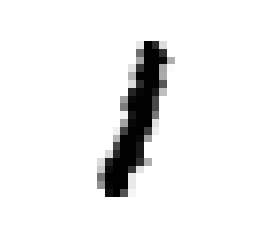

In [87]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[16000]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [88]:
# shuffle the rain set
import numpy as np

shuffle_index = np.random.permutation(42000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [122]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([ 0.88067695,  0.86583798,  0.88112588])

In [101]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [123]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([ 0.9117395 ,  0.90784398,  0.91013002])

In [114]:
import pandas as pd
import numpy as np

def load_mnist_test_dataset():
    csv_path = os.path.join(MNIST_PATH, "kaggle_mnist_test.csv")
    return pd.read_csv(csv_path)

mnist_test = load_mnist_test_dataset()
X_test = mnist_test.as_matrix()
predictions = forest_clf.predict(X_test)

df = pd.DataFrame(data = {'ImageId':np.arange(1, len(X_test) + 1, 1), 'Label':predictions})

In [119]:
df.to_csv('test.csv', index=False)

In [120]:
from sklearn.externals import joblib

joblib.dump(forest_clf, "mnist_forest_clf.pkl")

new_fr = joblib.load("mnist_forest_clf.pkl")